In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Load the data 

In [44]:
df = pd.read_csv("CHARGE_TS_DATA_ALLIANDER.csv", sep=';',index_col="ds")

In [45]:
df

,region,production
ds,,
2019-01-02,AMS,0.00
2019-01-02,AMS,0.00
2019-01-02,GLD,5821.62
2019-01-02,GLD,4709.52
2019-01-02,AMS,0.00
...,...,...
2024-10-16,RBNH,9220.92
2024-10-16,GLD,56155.75
2024-10-16,GLD,30216.98


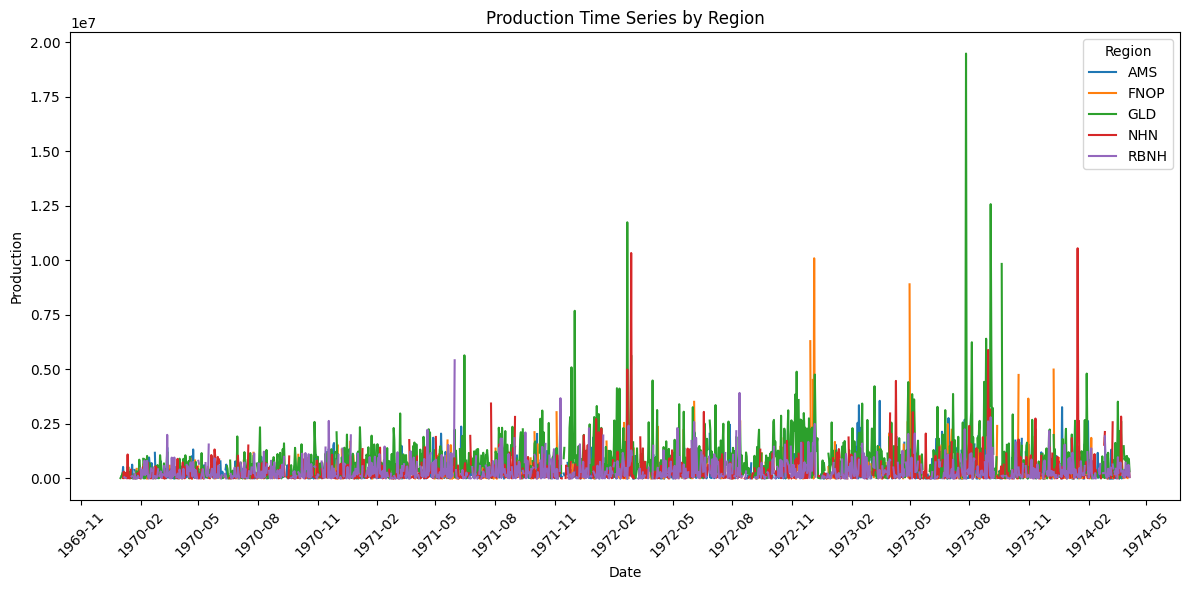

In [46]:
# Sample DataFrame creation for demonstration (use your actual DataFrame)
# df = pd.read_csv('your_file.csv')  # if loading from a file

# Resample data by date and region, summing production if there are duplicates
df_resampled = df.groupby(['ds', 'region']).sum().unstack()

# Reset multi-index columns to make it easier to access each region
df_resampled.columns = df_resampled.columns.droplevel()

# Plot each region's time series
plt.figure(figsize=(12, 6))
for region in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[region], label=region)
b
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Production Time Series by Region')
plt.legend(title="Region")
plt.xticks(rotation=45)

# Set the date format on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Adjust frequency


plt.tight_layout()
plt.savefig('use_case1.png')
plt.show()

### Aggregate the data

In [47]:

df_aggregated = df.groupby(['ds', 'region']).agg({'production': 'sum'})

# Reset index to make it easier to pivot
df_aggregated = df_aggregated.reset_index()

# Pivot so each region has its own column with dates as the index
df_pivot = df_aggregated.pivot(index='ds', columns='region', values='production')



In [48]:
df_aggregated

,ds,region,production
0,2019-01-02,AMS,69819.92
1,2019-01-02,GLD,18255.93
2,2019-01-03,GLD,78437.43
3,2019-01-07,AMS,127426.95
4,2019-01-07,GLD,133070.84
...,...,...,...
5875,2024-10-15,RBNH,594281.22
5876,2024-10-16,AMS,11110.56
5877,2024-10-16,GLD,328720.34
5878,2024-10-16,NHN,67327.09


In [43]:
# Check aggregation

# Ensure the index is a datetime index if it's not already
df.index = pd.to_datetime(df.index)

# Define the target date and region
target_date = '2019-01-02'
target_region = 'AMS'

# Filter the DataFrame for the specified date and region
selected_data = df.loc[target_date]
selected_data = selected_data[selected_data['region'] == target_region]

print(selected_data)
print('Sum for AMS region, date 2019-01-02', selected_data['production'].sum())

           region  production
ds                           
2019-01-02    AMS        0.00
2019-01-02    AMS        0.00
2019-01-02    AMS        0.00
2019-01-02    AMS    61876.12
2019-01-02    AMS     7943.80
Sum for AMS region, date 2019-01-02 69819.92


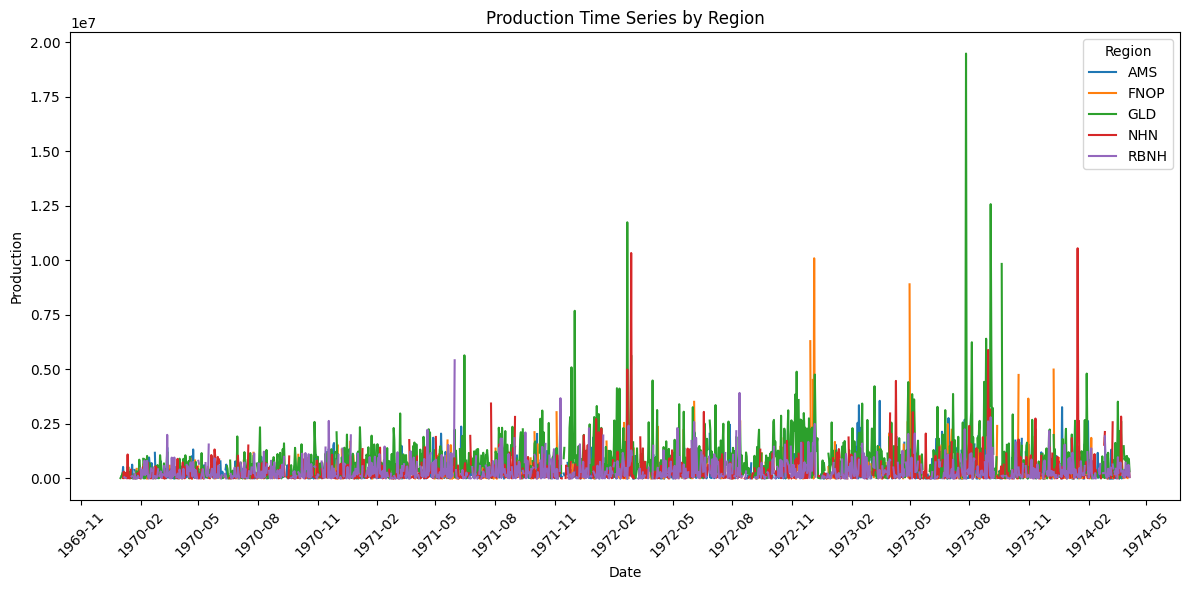

In [49]:
# Plot the results
plt.figure(figsize=(12, 6))
for region in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[region], label=region)

plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Production Time Series by Region')
plt.legend(title="Region")

# Formatting dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('UseCase1_aggregated.png')
plt.show()